熵权法：
信息熵，对于越有序、离散程度越小的熵值就小，反之越大。离散程度越大对评价的影响越大，自然权重也越大。以此用熵来求权重

熵权法是客观赋权法，可以不用查文献，直接从数据得到加权。

依据的原理是：指标的变异程度越小，反应的信息也就越少，对应的权值就越低。

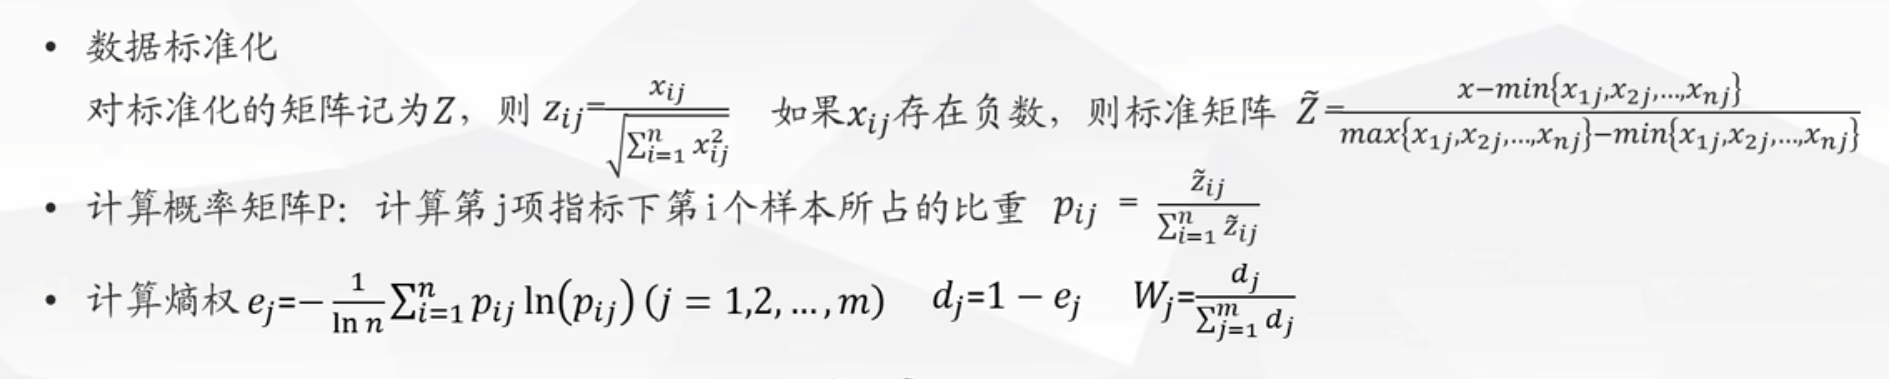

In [4]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-23 115431.png")

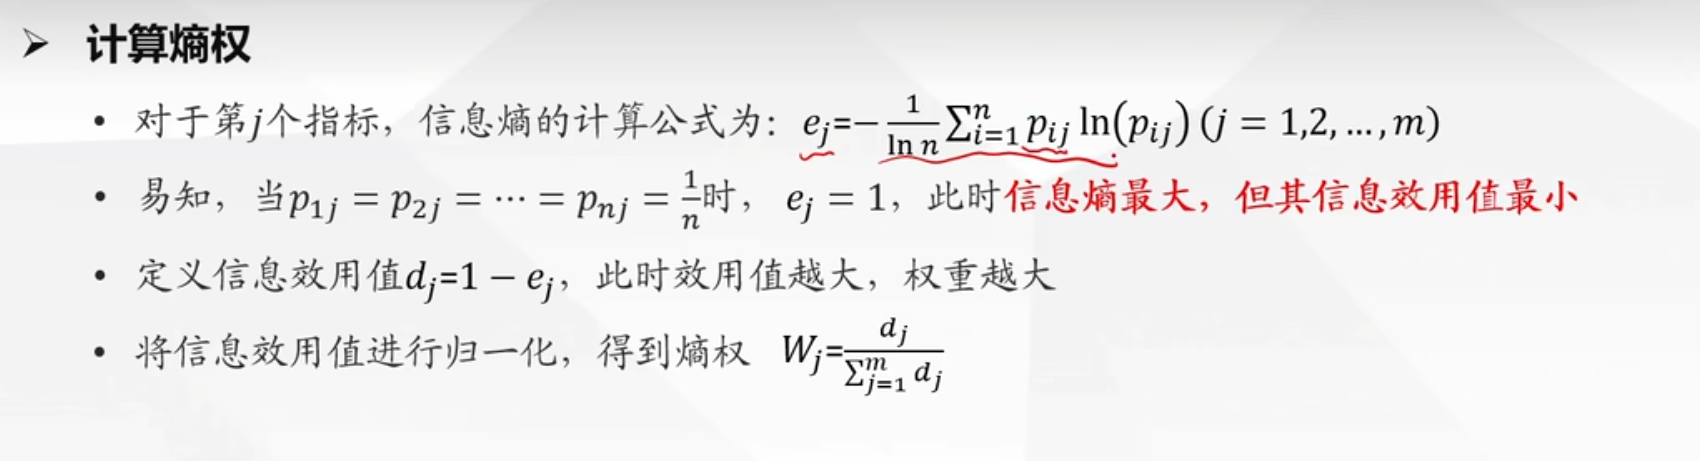

In [5]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-23 120653.png")

In [6]:
import numpy as np
def mylog(p):
    n = len(p)
    lnp = np.zeros(n)
    for i in range(n):
        if p[i] == 0:
            lnp[i] = 0
        else:
            lnp[i] = np.log(p[i])
    return lnp
X = np.array([[9,0,0,0],[8,3,0.9,0.5],[6,7,0.2,1]])
#标准化
Z = X/np.sqrt(np.sum(X**2,axis=0))
print("标准化矩阵",Z)
n,m = Z.shape
D = np.zeros((m))


标准化矩阵 [[0.66896473 0.         0.         0.        ]
 [0.59463532 0.3939193  0.97618706 0.4472136 ]
 [0.44597649 0.91914503 0.21693046 0.89442719]]


计算信息效用

In [7]:
for i in range(m):
    values = Z[:,i]
    p = values/np.sum(values) #对每一个指标进行归一化处理
    e = -np.sum(p * mylog(p))/np.log(n)
    D[i] = 1 - e
print("信息效用值",D)
    

信息效用值 [0.01238028 0.44396735 0.5684198  0.42061984]


In [13]:
W = np.zeros((m))
for j in range(m):
    W[j] = D[j]/np.sum(D)
print('加权为',W)

加权为 [0.00856537 0.30716152 0.39326471 0.2910084 ]


得分计算

In [16]:
score = np.zeros(n)
for i in range(n):
    s1 = W[0]*Z[i][0]
    s2 = W[1]*Z[i][1]
    s3 = W[2]*Z[i][2]
    s4 = W[3]*Z[i][3]
    score[i] = (s1+s2+s3+s4)*100
for i in range(n):
    print("第{0}个选择的得分为{1}".format(i+1,score[i]))


第1个选择的得分为0.5729933412598894
第2个选择的得分为64.01329544215888
第3个选择的得分为63.174285840516696
